In [42]:
import environmentv2 as e
import matplotlib.pyplot as plt
import numpy as np
import progressbar as pb

In [43]:
opt_policy = np.asarray([
[[9, 9, 9], [0, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9]],
[[2, 9, 9], [9, 3, 9], [0, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9]],
[[2, 9, 9], [9, 3, 2], [9, 3, 9], [2, 9, 9], [0, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9]],
[[2, 9, 9], [9, 3, 2], [9, 3, 2], [2, 3, 9], [2, 9, 9], [0, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9]],
[[2, 9, 9], [9, 3, 2], [9, 3, 2], [1, 3, 2], [2, 3, 9], [2, 9, 9], [2, 9, 9], [0, 9, 9], [9, 9, 9]],
[[2, 9, 9], [9, 3, 2], [9, 3, 2], [9, 3, 2], [1, 3, 2], [2, 3, 9], [2, 9, 9], [2, 9, 9], [0, 9, 9]],
[[2, 9, 9], [9, 3, 2], [9, 3, 2], [9, 3, 2], [9, 3, 2], [1, 3, 2], [2, 3, 9], [2, 9, 9], [2, 9, 9]],
[[2, 9, 9], [9, 3, 2], [9, 3, 2], [9, 3, 2], [9, 3, 2], [9, 3, 2], [1, 1, 1], [2, 9, 9], [2, 9, 9]],
[[2, 9, 9], [9, 2, 2], [9, 3, 2], [9, 3, 2], [9, 3, 2], [9, 3, 2], [9, 3, 9], [1, 1, 9], [2, 9, 9]]
])

In [44]:
learned_policy = np.asarray([
[[9, 9, 9], [0, 0, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9]], 
[[2, 9, 9], [9, 3, 2], [2, 2, 2], [0, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9]], 
[[2, 9, 9], [9, 3, 2], [2, 3, 2], [2, 2, 2], [2, 2, 2], [0, 9, 9], [9, 9, 9], [9, 9, 9], [9, 9, 9]], 
[[2, 9, 9], [9, 3, 2], [1, 1, 1], [2, 2, 2], [2, 2, 2], [2, 2, 2], [0, 9, 9], [9, 9, 9], [9, 9, 9]], 
[[2, 9, 9], [9, 3, 2], [9, 3, 2], [1, 1, 1], [2, 2, 2], [2, 2, 2], [2, 2, 2], [0, 9, 9], [9, 9, 9]], 
[[2, 9, 9], [9, 3, 2], [9, 3, 2], [9, 3, 2], [1, 1, 1], [2, 2, 2], [2, 2, 2], [2, 2, 2], [0, 0, 2]], 
[[2, 9, 9], [9, 3, 2], [9, 3, 2], [9, 3, 2], [9, 3, 1], [1, 1, 1], [2, 2, 2], [2, 2, 2], [2, 2, 2]], 
[[2, 9, 9], [9, 3, 1], [9, 3, 2], [9, 3, 2], [9, 3, 1], [9, 3, 1], [1, 1, 1], [2, 2, 2], [2, 2, 2]], 
[[1, 9, 9], [9, 3, 1], [9, 3, 1], [9, 3, 1], [9, 2, 1], [9, 3, 1], [9, 1, 1], [1, 1, 1], [2, 2, 2]], 
])

In [45]:
learned_policy.shape

(9, 9, 3)

In [46]:
episodes = 1000
length = 1000
alpha = 0.45
gamma = 0.5
rho = 0.6032638549804688
T = 9

In [47]:
env = e.Environment(alpha, gamma, T)

In [48]:
def evalReward(reward):
    reward = (1 - rho) * reward[0] - rho * reward[1]
    return reward

In [52]:
rewards_opt = []
bar = pb.ProgressBar()
for episode in bar(range(episodes)):
    _ = env.reset()
    current_reward = 0
    for _ in range(length):
        a, h, fork = env.current_state
        action = opt_policy[(a,h,fork)]
        _, reward = env.takeAction(action)
        current_reward += evalReward(reward)
    rewards_opt.append(current_reward)

100% (1000 of 1000) |####################| Elapsed Time: 0:00:17 Time:  0:00:17


In [53]:
rewards_learned = []
bar = pb.ProgressBar()
for episode in bar(range(episodes)):
    _ = env.reset()
    current_reward = 0
    for _ in range(length):
        a, h, fork = env.current_state
        action = learned_policy[(a,h,fork)]
        _, reward = env.takeAction(action)
        current_reward += evalReward(reward)
    rewards_learned.append(current_reward)

100% (1000 of 1000) |####################| Elapsed Time: 0:00:17 Time:  0:00:17


In [54]:
np.mean(rewards_opt), np.mean(rewards_learned) 

(-1459.0883456954957, -1459.627366279602)

In [81]:
plt.style.use('fivethirtyeight')
ax.set_facecolor('white')
f.set_facecolor('white')

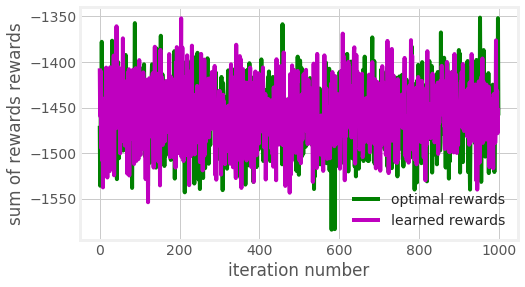

In [83]:
f, ax = plt.subplots(figsize=(7,4))
ax.plot(rewards_opt, label='optimal rewards', color='g')
ax.plot(rewards_learned, label='learned rewards', color='m')
ax.set_xlabel('iteration number')
ax.set_ylabel('sum of rewards rewards')
ax.set_facecolor('white')
f.set_facecolor('white')
plt.legend()
plt.show()

In [78]:
np.var(rewards_opt), np.var(rewards_learned)

(1143.0720549433972, 1060.3907217364595)